## Goal

In this chapter, we will understand the concepts of the k-Nearest Neighbour (kNN) algorithm.

## Theory

kNN is one of the simplest classification algorithms available for supervised learning. The idea is to search for the closest match(es) of the test data in the feature space. We will look into it with the below image.

![](01.jpg)

In the image, there are two families: Blue Squares and Red Triangles. We refer to each family as a Class. Their houses are shown in their town map which we call the Feature Space. You can consider a feature space as a space where all data are projected.

## Imports

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


## Create neighbours

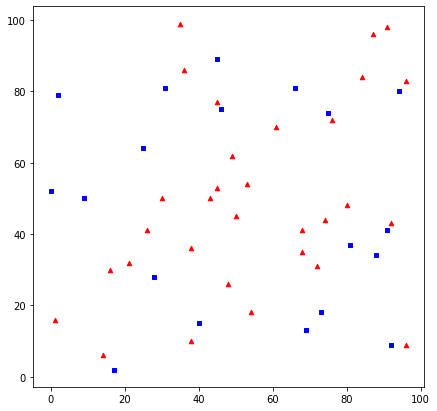

In [2]:
# Category
red, blue = 0, 1
cat = {red: 'red', blue: 'blue'}
numbers = 50

# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0, 100, (numbers, 2)).astype(np.float32)

# Label each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0, 2, (numbers, 1)).astype(np.float32)

plt.figure(figsize=(7, 7))

# Take Red neighbours and plot them
reds = trainData[responses.ravel() == red]
plt.scatter(reds[:, 0], reds[:, 1], 20, 'r', '^')

# Take Blue neighbours and plot them
blues = trainData[responses.ravel() == blue]
plt.scatter(blues[:, 0], blues[:, 1], 20, 'b', 's')

plt.show()


## K-Nearest for One New-comer

In [3]:
# create random test
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)

In [4]:
def category(array): return list(map(lambda x: cat[x], array.ravel()))


knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbours, dist = knn.findNearest(newcomer, 5)


print("result: {}".format(category(results)))
print("neighbours: {}".format(category(neighbours)))
print("distance: {}".format(dist))


result: ['red']
neighbours: ['red', 'blue', 'blue', 'red', 'red']
distance: [[ 73. 136. 170. 202. 225.]]


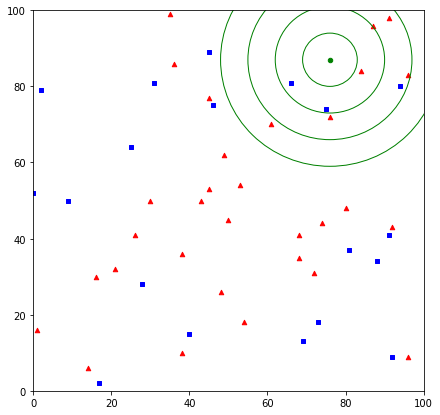

In [5]:
plt.figure(figsize=(7, 7))

plt.scatter(newcomer[:, 0], newcomer[:, 1], 20, 'g', 'o')
plt.scatter(reds[:, 0], reds[:, 1], 20, 'r', '^')
plt.scatter(blues[:, 0], blues[:, 1], 20, 'b', 's')

d1 = min(max(np.floor(dist[0][0] / 10), 5), 10)

circle1 = plt.Circle((newcomer[:, 0], newcomer[:, 1]), d1, color='g', fill=False)
circle2 = plt.Circle((newcomer[:, 0], newcomer[:, 1]), d1*2, color='g', fill=False)
circle3 = plt.Circle((newcomer[:, 0], newcomer[:, 1]), d1*3, color='g', fill=False)
circle4 = plt.Circle((newcomer[:, 0], newcomer[:, 1]), d1*4, color='g', fill=False)

ax = plt.gca()

# change default range so that new circles will work
ax.set_xlim((0, 100))
ax.set_ylim((0, 100))

# ax.cla() # clear things for fresh plot 
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)

plt.show()

## K-Nearest for Multiple New-comer

In [6]:
# create random test
newcomers = np.random.randint(0, 100, (10, 2)).astype(np.float32)

In [7]:
def category(array): return list(map(lambda x: cat[x], array.ravel()))


knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbours, dist = knn.findNearest(newcomers, 5)


print("result: {}".format(category(results)))
print("neighbours: {}".format(category(neighbours)))
print("distance: {}".format(dist))


result: ['blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red']
neighbours: ['blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red']
distance: [[ 29. 576. 613. 866. 890.]
 [ 74. 100. 125. 145. 202.]
 [ 18.  18.  45.  50. 101.]
 [ 80. 149. 185. 197. 256.]
 [250. 269. 360. 370. 949.]
 [  5.  45.  53. 164. 234.]
 [ 65. 116. 157. 185. 205.]
 [ 58. 193. 288. 661. 685.]
 [ 45.  50.  61. 272. 377.]
 [ 40. 116. 269. 298. 317.]]


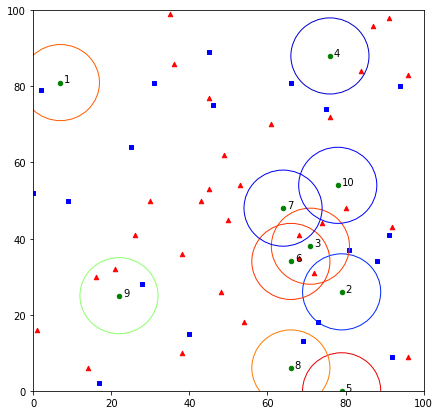

In [8]:
import matplotlib.cm as cm

plt.figure(figsize=(7, 7))

plt.scatter(newcomers[:, 0], newcomers[:, 1], 20, 'g', 'o')
plt.scatter(reds[:, 0], reds[:, 1], 20, 'r', '^')
plt.scatter(blues[:, 0], blues[:, 1], 20, 'b', 's')

circles = []
for i in range(10):
    circle = plt.Circle((newcomers[i, 0], newcomers[i, 1]), 10, color=cm.jet(np.random.rand()), fill=False)
    plt.text(newcomers[i, 0]+1, newcomers[i, 1], str(i+1))
    circles.append(circle)

ax = plt.gca()

# change default range so that new circles will work
ax.set_xlim((0, 100))
ax.set_ylim((0, 100))

# # ax.cla() # clear things for fresh plot 
for i in range(10):
    ax.add_patch(circles[i])

plt.show()

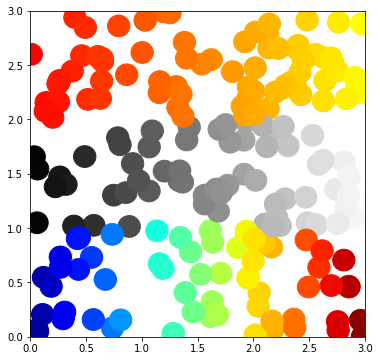

In [9]:
# Color in matplotlib
import matplotlib

N, r = 200, .1
cms = matplotlib.cm
maps = [cms.jet, cms.gray, cms.autumn]

fig = plt.figure(figsize=(6,6)) # give plots a rectangular frame
ax = fig.add_subplot(111)
pos = 2.999*np.random.rand(N,2)

for x, y in pos:
    cmi = int(y)               # an index for which map to use based on y-value
    #fc = np.random.random()   # use this for random colors selected from regional map
    fc = x/3.                  # use this for x-based colors
    color = maps[cmi](fc)      # get the right map, and get the color from the map
                      # ie, this is like, eg, color=cm.jet(.75) or color=(1.0, 0.58, 0.0, 1.0)
    circle = plt.Circle((x,y), r, color=color)   # create the circle with the color
    ax.add_artist(circle)   
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.show()